
# Assignment 2 for Course 1MS041
Make sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline and your highest score will be used.

---
## Assignment 2, PROBLEM 1
Maximum Points = 8


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [1.5p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [1.5p]
3. Is this Markov chain irreducible? [1.5p]
4. What is the stationary distribution? [1.5p]
5. Advanced question: What is the expected number of steps until the first time one enters the downtown region having started in the suburbs region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. [2p]



In [1]:
# Part 1
import numpy as np

p0 = [0, 1, 0]
P = np.matrix([[0.3, 0.4, 0.3], [0.2, 0.5, 0.3], [0.4, 0.3, 0.3]])
p2 = p0*P**2
print(p2.A1)

# Fill in the answer to part 1 below as a decimal number
problem1_p1 = 0.28


[0.28 0.42 0.3 ]


In [2]:
# Part 2
'''
suburbs -> suburbs      -> downtown = 0.5*0.2
suburbs -> countryside  -> downtown = 0.3*0.4

'''
answer = 0.5*0.2 + 0.3*0.4
print(answer)


# Fill in the answer to part 2 below as a decimal number
problem1_p2 = answer

0.22


In [3]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

In [4]:
# Part 4

eigenvalues, eigenvectors = np.linalg.eig(P.T)
print(eigenvalues)
print(eigenvectors)
#eigenvalue at index 0 has value 1. We are therefore interested in the first eigenvector.
ev_1 = eigenvectors[:,0]
print(ev_1)
ev_1 = ev_1 / np.sum(ev_1)
print(ev_1)

answer = np.array([0.289, 0.411, 0.3       ])
print(answer)
print(np.sum(answer))
print(type(answer))

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = answer

[ 1.00000000e+00 -1.19785097e-16  1.00000000e-01]
[[-4.93651112e-01 -8.16496581e-01  7.07106781e-01]
 [-7.02503505e-01  4.08248290e-01 -7.07106781e-01]
 [-5.12637693e-01  4.08248290e-01  6.60050274e-16]]
[[-0.49365111]
 [-0.70250351]
 [-0.51263769]]
[[0.28888889]
 [0.41111111]
 [0.3       ]]
[0.289 0.411 0.3  ]
1.0
<class 'numpy.ndarray'>


In [5]:
# Part 5
'''
First we set up equations for the number of steps to reach downtown from suburbs and countryside.
We need both since they depend on each other and make up an equation system.

h_s = 0.2 + 0.5(1+h_s) + 0.3(1 + h_c)
h_c = 0.4 + 0.3(1+h_s) + 0.3(1 + h_c)

Simplifying the system we get:
1 =  0.5h_s - 0.3h_c
1 = -0.3h_s + 0.7h_c

this is then solved with numpys linalg solve
'''

A = np.array([[0.5, -0.3], 
              [-0.3, 0.7]])

b = np.array([1, 1])

x = np.linalg.solve(A, b)

print(x)
print(x[0])

# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number
problem1_ET = x[0]

[3.84615385 3.07692308]
3.8461538461538463


---
## Assignment 2, PROBLEM 2
Maximum Points = 4


Use the **Multi-dimensional Constrained Optimisation** example (in `07-Optimization.ipynb`) to numerically find the MLe for the mean and variance parameter based on `normallySimulatedDataSamples`, an array obtained by a specific simulation of $30$ IID samples from the $Normal(10,2)$ random variable.

Recall that $Normal(\mu, \sigma^2)$ RV has the probability density function given by:

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

You know that the log likelihood function for $n$ IID samples from a Normal RV with parameters $\mu$ and $\sigma$ simply follows from $\sum_{i=1}^n \log(f(x_i; \mu,\sigma))$, based on the IID assumption. 

NOTE: When setting bounding boxes for $\mu$ and $\sigma$ try to start with some guesses like $[-20,20]$ and $[0.1,5.0]$ and make it larger if the solution is at the boundary. Making the left bounding-point for $\sigma$ too close to $0.0$ will cause division by zero Warnings. Other numerical instabilities can happen in such iterative numerical solutions to the MLe. You need to be patient and learn by trial-and-error. You will see the mathematical theory in more details in a future course in scientific computing/optimisation. So don't worry too much now except learning to use it for our problems.  

In [6]:

import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]

    return -np.sum(np.log((1 / (sigma_param*np.sqrt(2*np.pi))) * np.exp((-1/(2*sigma_param**2)) * (normallySimulatedDataSamples - mu_param)**2)))

# you should only change XXX below and not anything else
parameter_bounding_box=((-20, 20), (0.1, 5)) # specify the constraints for each parameter - some guess work...
initial_arguments = np.array([10, 4]) # point in 2D to initialise the minimize algorithm
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box) 
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_problem2_opt

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 58.63138728595594
        x: [ 9.269e+00  1.708e+00]
      nit: 6
      jac: [-2.686e-04  4.974e-05]
     nfev: 39
     njev: 13
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

---
## Assignment 2, PROBLEM 3
Maximum Points = 4



Derive the maximum likelihood estimate for $n$ IID samples from a random variable with the following probability density function:
$$
f(x; \lambda) = \frac{1}{24} \lambda^5 x^4 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

You can solve the MLe by hand (using pencil paper or using key-strokes). Present your solution as the return value of a function called `def MLeForAssignment2Problem3(x)`, where `x` is a list of $n$ input data points.

In [7]:

# do not change the name of the function, just replace XXX with the appropriate expressions for the MLe
def MLeForAssignment2Problem3(x):
    '''write comment of what this function does'''
    return 5*len(x) / sum(x)

---
## Assignment 2, PROBLEM 4
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [8]:
'''



import numpy as np
import math

def primeFactors(n):
    r = list()
    while n % 2 == 0:
        r.append(2)
        n = n // 2
         
    for i in range(3,int(math.sqrt(n))+1,2):
         
        while n % i== 0:
            r.append(i)
            n = n // i
             
    if n > 2:
        r.append(n)
    return r
         
#M = 2**64
#a = 2**32
#b = 3**20


M = 2**64 +1 
a = 2**42 +1 
b = 2**30 +1 

if (a-1) % 4 != 0:
    print("(a-1) % 4 != 0:")

if (M-1) % 4 != 0:
    print("(M-1) % 4 != 0:")
    
if np.gcd(b, M) != 1:
    print("np.gcd(b, M) != 1:")

M_prime = primeFactors(M)
a_prime = primeFactors(a-1)
print(M_prime)
print(a_prime)
print("True")

#while primeFactors(a) not in primeFactors(M):
#    a +=1
#    print(a)

#primeFactors(M)
#primeFactors(a)

'''


def problem4_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    if size < 1:
        return np.zeros(1)

    M = 2**64 +1 
    a = 2**42 +1 
    b = 2**30 +1 
    xs = list()

    for i in range(size):
        if i == 0:
            xs.append((a*seed+b) % M)
        else:
            xs.append((a*xs[-1]+b) % M)

    return np.array(xs)


In [9]:

def problem4_uniform(generator=None, period=1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem1_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """

    xs = generator(size, seed)

    xs_uniform = xs / np.abs(period)
    return xs_uniform



In [48]:

def problem4_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution.
    Runs n_iterations
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    n_iterations : an integer denoting how many attempts should be made in the accept-reject sampler
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    
    xs = uniformGenerator(size=n_iterations, seed=seed)

    res = list()
    # for the m in f(x) <= Mg(x) we look for the max in f(x), 
    m = np.pi/2

    for i, x in enumerate(xs): 
        g = np.pi/2 * np.abs(np.sin(2*np.pi*x))
        r = x / (m*g)
        u = uniformGenerator(size=1, seed=seed+i)
        if u <= r:
            res.append(x)
   
    return res 


---
#### Local Test for Assignment 2, PROBLEM 4
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

LCG output: [4.39912025e+12 1.31962860e+13 1.38339585e+19 1.38305995e+19
 4.60049959e+18 3.43608050e+18 1.84055523e+19 4.54105369e+18
 1.80407112e+19 1.27762409e+19]
Uniform sampler [2.38476787e-07 7.15372096e-07 7.49940396e-01 7.49758303e-01
 2.49393583e-01 1.86270297e-01 9.97766987e-01 2.46171014e-01
 9.77988916e-01 6.92601405e-01]
Accept-Reject sampler [np.float64(2.384767867625844e-07), np.float64(7.153720957693804e-07), np.float64(0.7499403955296202), np.float64(0.7497583034122498), np.float64(0.24939358270670184), np.float64(0.1862702971390744), np.float64(0.9977669874061231), np.float64(0.2461710140282166), np.float64(0.9779889161338167), np.float64(0.6926014054181471), np.float64(0.7014902002319553), np.float64(0.4990914944523887), np.float64(0.508494604277677), np.float64(0.15501104460950235), np.float64(0.563352653904655), np.float64(0.11058204807624743), np.float64(0.5853909531203483), np.float64(0.3785564973568146), np.float64(0.2676631576484013), np.float64(0.8989976371188

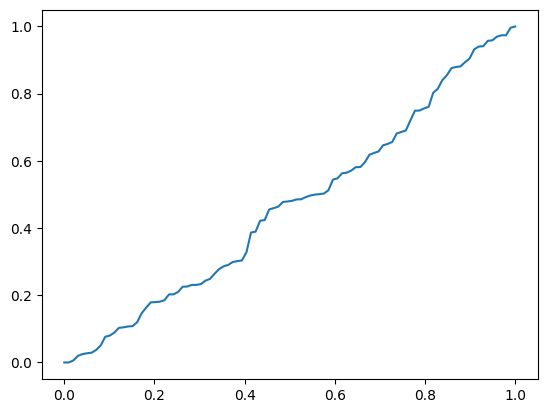

In [49]:
        
# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

import matplotlib.pyplot as plt
import numpy as np

print("LCG output: %s" % problem4_LCG(size=10, seed = 1))

period = 2**64 +1

print("Uniform sampler %s" % problem4_uniform(generator=problem4_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem4_uniform(generator=problem4_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))

xs = np.linspace(0,1,100)
ys = problem4_accept_reject(uniform_sampler,len(xs),0)
print(len(xs)==len(ys))

plt.plot(xs, np.sort(ys))
plt.show()

In [12]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

Accept-Reject sampler [0.763774618976614, 0.49543508709194095, 0.651592972722763, 0.7887233511355132, 0.762280082457942, 0.9452706955539223]
